In [5]:
import torch
import torch.nn.utils as utils

def count_params(model):
    params = utils.parameters_to_vector(model.parameters())
    num_params = torch.numel(params)
    return num_params

# Google Bert
BERT is a transformers model pretrained on a large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labeling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts. More precisely, it was pretrained with two objectives:

* **Masked language modeling (MLM):** Taking a sentence, the model **randomly masks 15% of the words in the input** then run the entire masked sentence through the model and has to **predict the masked words**. It allows the model to learn a bidirectional representation of the sentence.
* **Next sentence prediction (NSP):** The models concatenates two masked sentences as inputs during pretraining. Sometimes they correspond to sentences that were next to each other in the original text, sometimes not. The model then has to **predict if the two sentences were following each other or not**.

This way, the model learns an inner representation of the English language that can then be used to extract features useful for downstream tasks: if you have a dataset of labeled sentences, for instance, you can train a standard classifier using the features produced by the BERT model as inputs.

BERT has originally been released in base and large variations, for cased and uncased input text.

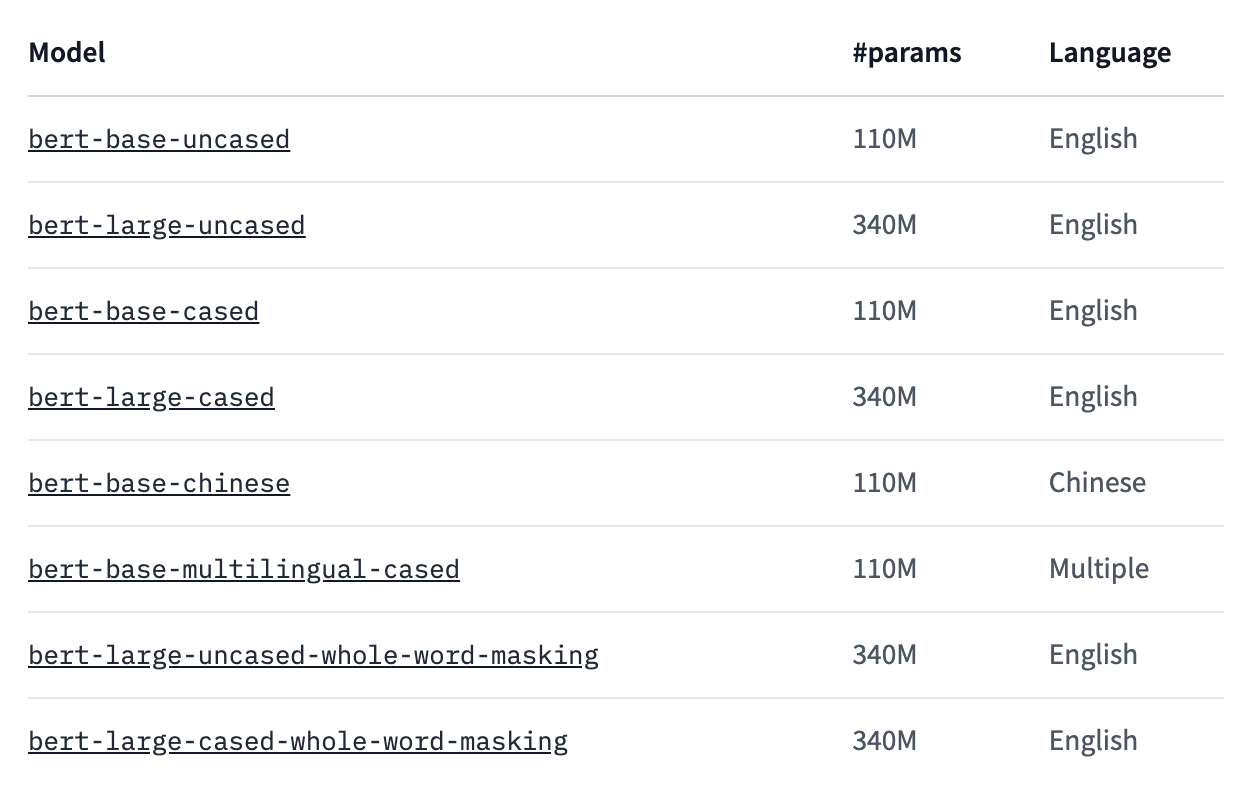

## Bert base uncased (110M, ~1.5GB)

In [2]:
from transformers import pipeline

pipe = pipeline('fill-mask', model='bert-base-uncased', device='cuda:0')
pipe("Hello, it's me. I was [MASK] if after all these years you'd like to meet to go over everything.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.99429851770401,
  'token': 6603,
  'token_str': 'wondering',
  'sequence': "hello, it's me. i was wondering if after all these years you'd like to meet to go over everything."},
 {'score': 0.004880859516561031,
  'token': 4851,
  'token_str': 'asking',
  'sequence': "hello, it's me. i was asking if after all these years you'd like to meet to go over everything."},
 {'score': 0.00030451221391558647,
  'token': 5327,
  'token_str': 'hoping',
  'sequence': "hello, it's me. i was hoping if after all these years you'd like to meet to go over everything."},
 {'score': 0.00018215276941191405,
  'token': 2356,
  'token_str': 'asked',
  'sequence': "hello, it's me. i was asked if after all these years you'd like to meet to go over everything."},
 {'score': 0.00012052038073306903,
  'token': 4999,
  'token_str': 'wondered',
  'sequence': "hello, it's me. i was wondered if after all these years you'd like to meet to go over everything."}]

In [3]:
pipe.model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [4]:
pipe.model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [5]:
print('Number of parameters in Bert-base-uncased:', count_params(pipe.model))

Number of parameters in Bert-base-uncased: 109514298


## Bert large uncased (340M, ~2.3GB)

In [1]:
from transformers import pipeline

pipe = pipeline('fill-mask', model='bert-large-uncased', device='cuda:0')
pipe("Hello, it's me. I was [MASK] if after all these years you'd like to meet to go over everything.")

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.9992243051528931,
  'token': 6603,
  'token_str': 'wondering',
  'sequence': "hello, it's me. i was wondering if after all these years you'd like to meet to go over everything."},
 {'score': 0.0003645450924523175,
  'token': 3241,
  'token_str': 'thinking',
  'sequence': "hello, it's me. i was thinking if after all these years you'd like to meet to go over everything."},
 {'score': 0.00023779159528203309,
  'token': 4851,
  'token_str': 'asking',
  'sequence': "hello, it's me. i was asking if after all these years you'd like to meet to go over everything."},
 {'score': 6.253361061681062e-05,
  'token': 2356,
  'token_str': 'asked',
  'sequence': "hello, it's me. i was asked if after all these years you'd like to meet to go over everything."},
 {'score': 3.1299696274800226e-05,
  'token': 8025,
  'token_str': 'curious',
  'sequence': "hello, it's me. i was curious if after all these years you'd like to meet to go over everything."}]

In [2]:
pipe.model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-12, 

In [3]:
pipe.model.config

BertConfig {
  "_name_or_path": "bert-large-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [6]:
print('Number of parameters in Bert-large-uncased:', count_params(pipe.model))

Number of parameters in Bert-large-uncased: 335174458
